## ** 기말고사 프로젝트 <기말고사 프로젝트 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata_project(기말고사).ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2022.11.28(월요일) ~ 2022.12.11(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**

- - -


### **1. Kaggle의 Personal Key Indicators Heart Disease  데이터를 사용하여 ``의사결정트리(Decision Tree)``, ``랜덤포레스트(Randomforest)``, ``SVM(Support Vector Machine)``생성 모델을 만들고 생성한 모델의 예측결과를 출력하시오**

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. 모델 생성에 필요한 전처리 과정을 진행 하시오.
2. 모든 모델의 생성 과정을 코드로 명시 하시오.
3. 적절한 반응변수와 설명변수를 설정 하시오
4. createDataPartition을 사용하여 적절하게  Train set과 Test set을 분류하시오.
5. Train set을 사용하여 모델을 생성하시오.
6. Hyperparameter 튜닝을 진행 하시오.
7. Test set을 이용한 Predict(예측) 결과를 confusionMatrix를 사용하여 출력하시오.
```
데이터 링크 : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download


In [ ]:
install.packages("data.table")
library(data.table)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [ ]:
DF <- read.csv(file = "/content/sample_data/heart_2020_cleaned.csv") ## Data 읽어오기

Confusion Matrix Plot code

In [ ]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

#### 데이터 자료형 변환

In [ ]:
DF <- DF %>% 
 mutate_at(`.vars` = c("Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer", "HeartDisease"), `.funs` = as.factor)
DF %>% str()

'data.frame':	54746 obs. of  18 variables:
 $ HeartDisease    : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ BMI             : num  16.6 20.3 26.6 24.2 23.7 ...
 $ Smoking         : Factor w/ 2 levels "0","1": 2 1 2 1 1 2 1 2 1 1 ...
 $ AlcoholDrinking : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Stroke          : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 1 ...
 $ PhysicalHealth  : int  3 0 20 0 28 6 15 5 0 0 ...
 $ MentalHealth    : int  30 0 30 0 0 0 0 0 0 0 ...
 $ DiffWalking     : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 1 2 1 2 ...
 $ Sex             : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 2 ...
 $ AgeCategory     : Factor w/ 13 levels "1","2","3","4",..: 8 13 10 12 5 12 11 13 13 10 ...
 $ Race            : Factor w/ 6 levels "1","2","3","4",..: 5 5 5 5 5 3 5 5 5 5 ...
 $ Diabetic        : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 2 1 1 ...
 $ PhysicalActivity: Factor w/ 2 levels "0","1": 2 2 2 1 2 1 2 1 1 2 ...
 $ GenHealth       : int  5 5 2 3 5 

#### 과제에 사용하는 데이터 정상, 비정상 랜덤 추출
 - 정상 데이터 & 비정상 데이터 1000개 랜덤 추출

In [ ]:
HD <- DF[DF$HeartDisease == 1, ]
HD_1000 <- HD[sample(nrow(HD), 1000, replace = F), ]

HC <- DF[DF$HeartDisease == 0, ]
HC_1000 <- HC[sample(nrow(HC), 1000, replace = F), ]

data <- bind_rows(HD_1000, HC_1000)
data <- data[sample(1:nrow(data)), ]

#### **1. 의사결정트리(Decision Tree)**

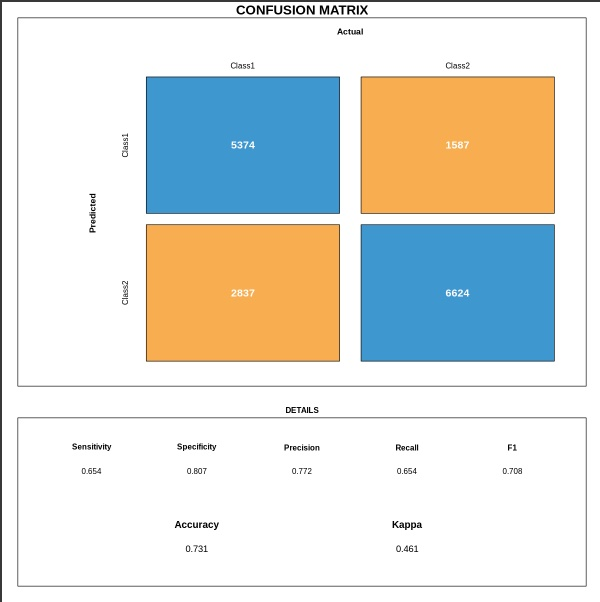

In [ ]:
data <- data %>% as_tibble() # data를 형태를 tibble형태로 변환시킵니다.

str(data) # data가 제대로 변환됐는지 확인합니다.

tibble [2,000 × 18] (S3: tbl_df/tbl/data.frame)
 $ HeartDisease    : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 2 1 2 2 ...
 $ BMI             : num [1:2000] 32.9 23.7 30.7 25.5 35.4 ...
 $ Smoking         : Factor w/ 2 levels "0","1": 1 2 1 1 1 2 2 2 1 2 ...
 $ AlcoholDrinking : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 1 1 1 ...
 $ Stroke          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysicalHealth  : int [1:2000] 30 0 0 0 0 30 0 0 30 30 ...
 $ MentalHealth    : int [1:2000] 30 0 0 0 0 10 0 0 0 0 ...
 $ DiffWalking     : Factor w/ 2 levels "0","1": 2 1 1 1 1 2 1 1 2 2 ...
 $ Sex             : Factor w/ 2 levels "1","2": 2 2 2 1 1 1 1 2 1 1 ...
 $ AgeCategory     : Factor w/ 13 levels "1","2","3","4",..: 10 13 12 3 10 11 10 12 9 9 ...
 $ Race            : Factor w/ 6 levels "1","2","3","4",..: 5 5 5 5 4 5 5 5 5 5 ...
 $ Diabetic        : Factor w/ 2 levels "0","1": 1 1 2 1 2 1 2 1 1 1 ...
 $ PhysicalActivity: Factor w/ 2 levels "0","1": 2 2 2 2 1 1 1 2 1 2 ...
 $ GenH

In [ ]:
summary(data) #data 데이터의 요약본을 확인합니다.

 HeartDisease      BMI        Smoking  AlcoholDrinking Stroke   PhysicalHealth 
 0:1000       Min.   :13.31   0:1023   0:1886          0:1802   Min.   : 0.00  
 1:1000       1st Qu.:24.41   1: 977   1: 114          1: 198   1st Qu.: 0.00  
              Median :27.89                                     Median : 0.00  
              Mean   :28.85                                     Mean   : 5.37  
              3rd Qu.:31.93                                     3rd Qu.: 5.00  
              Max.   :68.66                                     Max.   :30.00  
                                                                               
  MentalHealth    DiffWalking Sex       AgeCategory  Race     Diabetic
 Min.   : 0.000   0:1512      1: 953   11     :272   1:  44   0:1570  
 1st Qu.: 0.000   1: 488      2:1047   13     :253   2:  34   1: 430  
 Median : 0.000                        10     :248   3: 142           
 Mean   : 4.198                        9      :229   4: 174           
 3rd 

In [ ]:
install.packages("caret") #train과 test을 createDataPartition을 사용하여 분류하기위해 caret을 설치합니다.
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
# 4. createDataPartition을 사용하여 적절하게  Train set과 Test set을 분류하시오.
index <- createDataPartition(y = data$HeartDisease, p = 0.7, list = FALSE)
head(index, 20)

Resample1
3
4
7
8
12
15
16
18
19
20


In [ ]:
#train과 test를 분류합니다.
train <- data[index, ]
test <- data[-index, ]

#분류된 train과 test를 확인합니다.
train %>% show()
test %>% show()

# A tibble: 1,400 × 18
   HeartDis…¹   BMI Smoking Alcoh…² Stroke Physi…³ Menta…⁴ DiffW…⁵ Sex   AgeCa…⁶
   <fct>      <dbl> <fct>   <fct>   <fct>    <int>   <int> <fct>   <fct> <fct>  
 1 1           30.7 0       0       0            0       0 0       2     12     
 2 0           25.5 0       1       0            0       0 0       1     3      
 3 1           29.3 1       0       0            0       0 0       1     10     
 4 0           24.4 1       0       0            0       0 0       2     12     
 5 0           29.0 0       0       0            0       0 0       1     9      
 6 0           33.9 1       0       0            0       1 0       2     1      
 7 1           28.0 0       0       0            0       0 0       2     10     
 8 0           25.6 1       0       0            0       0 0       2     5      
 9 1           25.8 1       0       0           15       0 0       2     10     
10 0           49.4 0       0       0            0       1 0       2     1      
# … w

In [ ]:
library(rpart) #의사결정트리를 만들기위해 rpart라이브러리를 설치합니다.

#fomula = outcome ~ predictor1+...
#data = 사용할 데이터 train으로 설정
# method = 범주형 변수로 할지 연속형 변수로 할지
HD_dt <- rpart(formula = HeartDisease ~ ., data = train, method = "class")


In [ ]:
#Variable importance를 확인하여 어떤 변수가 가장 중요한 변수인지 확인합니다.
#AgeCategory가 가장 중요한 변수인것을 알 수 있다.
summary(HD_dt)

Call:
rpart(formula = HeartDisease ~ ., data = train, method = "class")
  n= 1400 

          CP nsplit rel error    xerror       xstd
1 0.32714286      0 1.0000000 1.0828571 0.02663422
2 0.04928571      1 0.6728571 0.6728571 0.02525552
3 0.01857143      3 0.5742857 0.5785714 0.02423690
4 0.01285714      4 0.5557143 0.5885714 0.02435931
5 0.01000000      8 0.5042857 0.5828571 0.02428980

Variable importance
   AgeCategory       Diabetic PhysicalHealth    DiffWalking            BMI 
            56             13             11              8              3 
           Sex   MentalHealth           Race  KidneyDisease      GenHealth 
             3              1              1              1              1 
     SleepTime        Smoking 
             1              1 

Node number 1: 1400 observations,    complexity param=0.3271429
  predicted class=0  expected loss=0.5  P(node) =1
    class counts:   700   700
   probabilities: 0.500 0.500 
  left son=2 (323 obs) right son=3 (1077 obs)


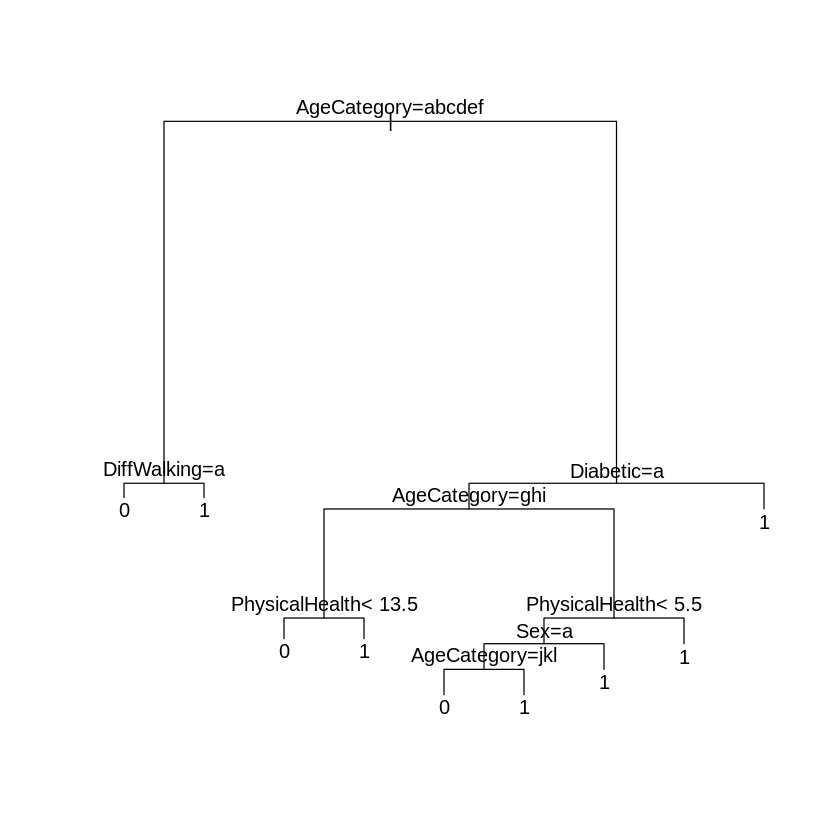

In [ ]:
#트리구도를 plotting과정 통해 시각화 합니다.
plot(HD_dt)
text(HD_dt)

In [ ]:
#더 나은 트리구도를 위해 패키지를 설치합니다.
install.packages(c("rattle", "rpart.plot"))

library(rattle)
library(rpart.plot)
library(RColorBrewer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’


Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



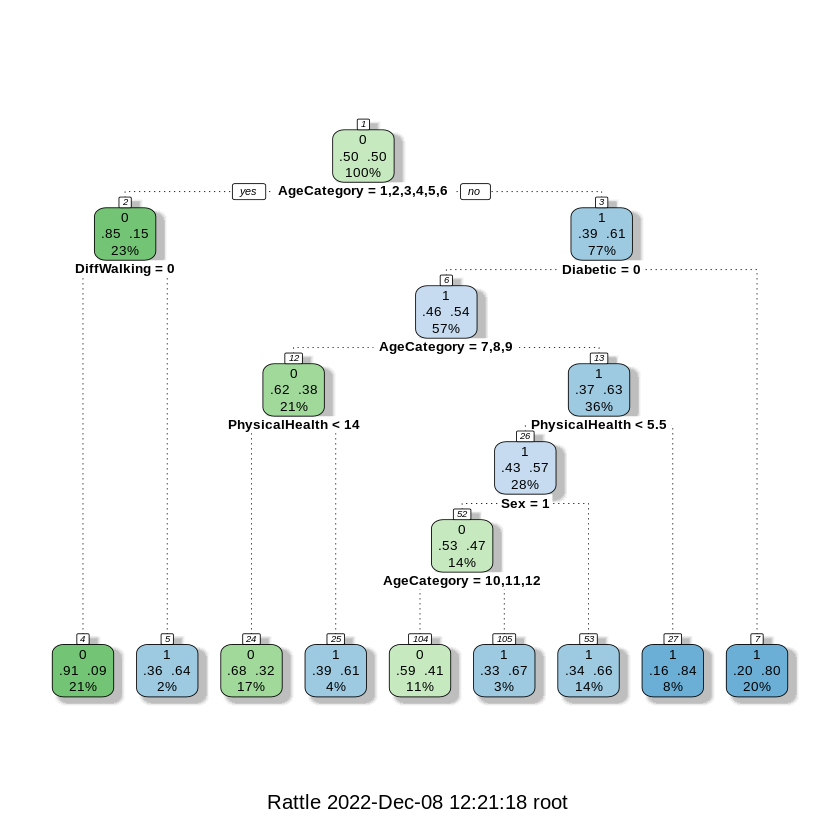

In [ ]:
#트리구도를 보기 위해 fancyRpartPlot을 사용합니다.
fancyRpartPlot(HD_dt)

A. node의 성질
  - 박스 가장 위의 0이라는 구분자는 해당 node는 0(음성)이라고 구분될 수 있다는 것을 의미. 같은 원리로 가장 아랫줄의 제일 오른쪽 node(7)을 보면 1. 해당 node에 속하는 관측치는 양성그룹으로 분류

B. node의 순도
  - node의 순도(지니 불순도)는 node의 색상(진하기) 및 두번째 열의 숫자로 확인. 7번 node는 0.20, 0.80으로 표시되어 있음. 이 의미는 이 node에 속하는 관측치 중 20%는 0, 80%는 1에 속한다는 의미.

C. node가 전체에서 차지하는 비중
  - 15번 node로 돌아가서, 가장 아랫쪽 숫자 20%가 의미하는 것은 해당 node가 전체 데이터 셋에서 차지하는 비중. 전체의 20%의 관측자가 이 node에 속한다고 볼 수 있음.

In [ ]:
#rpart::printcp을 이용한 가지치기(pruning)
#가지가 많으면 overfitting이 나타날 수 있음으로 pruning을 실행한다.

#xerror가 최소가 되는 값을 찾는다.
rpart::printcp(HD_dt)


Classification tree:
rpart(formula = HeartDisease ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] AgeCategory    Diabetic       DiffWalking    PhysicalHealth Sex           

Root node error: 700/1400 = 0.5

n= 1400 

        CP nsplit rel error  xerror     xstd
1 0.327143      0   1.00000 1.08286 0.026634
2 0.049286      1   0.67286 0.67286 0.025256
3 0.018571      3   0.57429 0.57857 0.024237
4 0.012857      4   0.55571 0.58857 0.024359
5 0.010000      8   0.50429 0.58286 0.024290


In [ ]:
#xerror(cross validation error)가 최소가 되는 CP를 선택
HD_dt$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror))

min_xerror_cp <- HD_dt$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror)) %>% pull(CP)

CP,nsplit,rel error,xerror,xstd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01857143,3,0.5742857,0.5785714,0.0242369


In [ ]:
min_xerror_cp

[1] 0.01857143

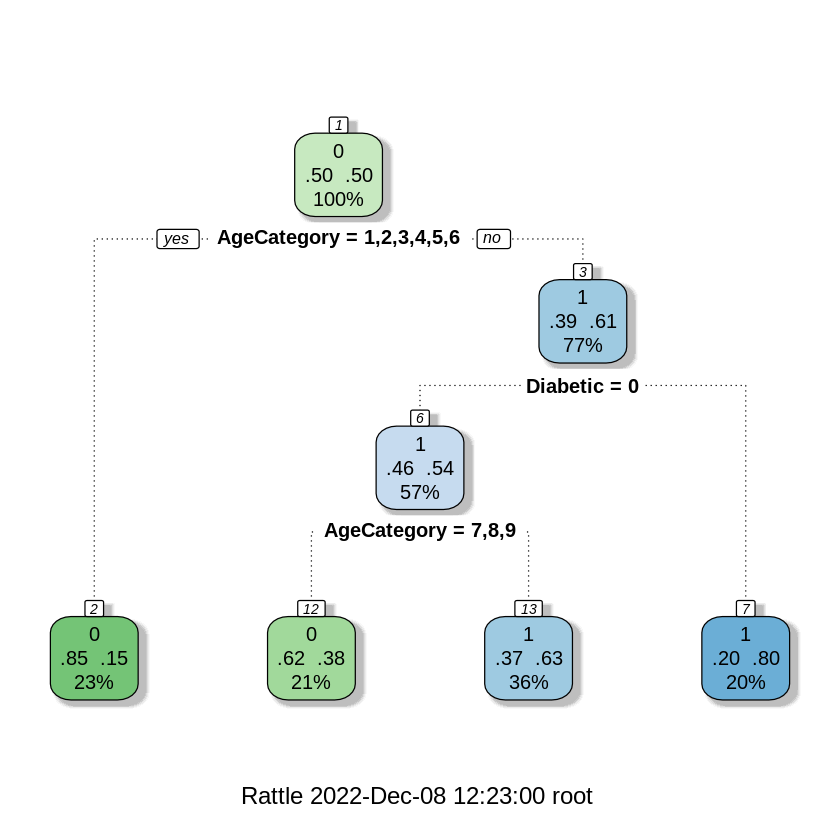

In [ ]:
#prune 가지치기를 실행합니다.
HD_dt_pr <- rpart::prune(HD_dt, cp = min_xerror_cp)

#prune 과정을 거쳐 가지치기한 트리구도를 보기 위해 fancyRpartPlot을 사용합니다.
fancyRpartPlot(HD_dt_pr)

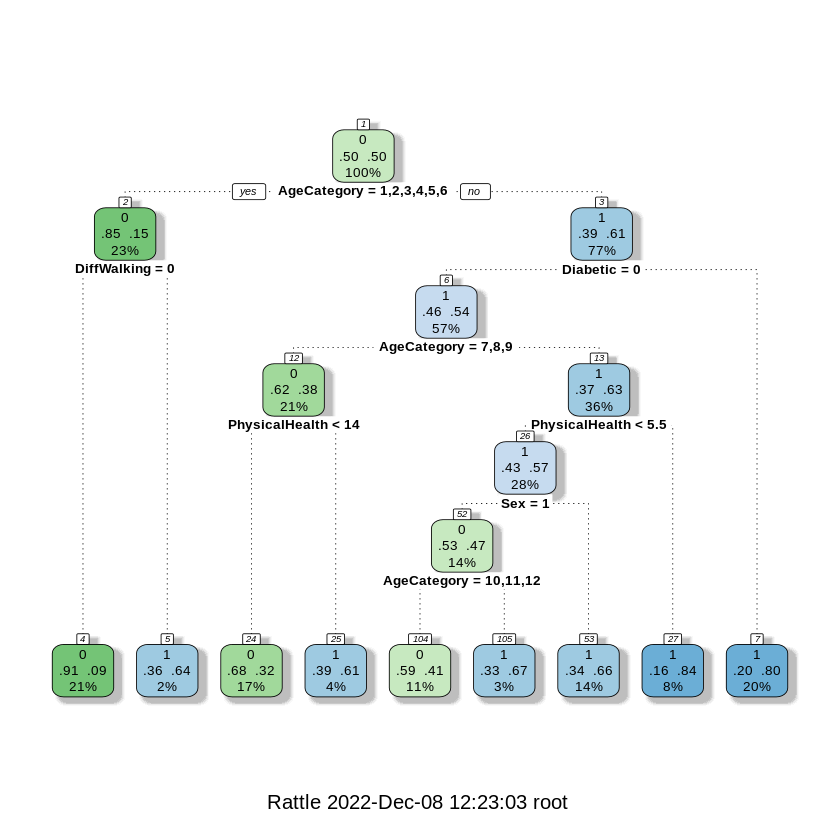

In [ ]:
#이전 그래프
fancyRpartPlot(HD_dt)

In [ ]:
#테스트 데이터를 확인합니다.
test %>% show()

# A tibble: 600 × 18
   HeartDis…¹   BMI Smoking Alcoh…² Stroke Physi…³ Menta…⁴ DiffW…⁵ Sex   AgeCa…⁶
   <fct>      <dbl> <fct>   <fct>   <fct>    <int>   <int> <fct>   <fct> <fct>  
 1 0           32.9 0       0       0           30      30 1       2     10     
 2 1           23.7 1       0       0            0       0 0       2     13     
 3 0           35.4 0       0       0            0       0 0       1     10     
 4 0           43.0 1       0       0           30      10 1       1     11     
 5 1           24.2 0       0       0           30       0 1       1     9      
 6 1           22.2 1       0       0           30       0 1       1     9      
 7 1           26.3 0       0       0           25       0 0       1     11     
 8 1           37.2 1       0       0            3      10 0       1     8      
 9 0           56.0 1       0       0            0       0 1       1     6      
10 1           47.0 1       0       1           30       0 1       1     13     
# … wit

In [ ]:
#예측을 하기위해 predict함수를 사용하여 test데이터를 사용해 예측합니다.
predict_value <- predict(HD_dt_pr, test, type = "class") %>%
  tibble(predict_value = .)

#예측된 데이터를 확인합니다.
predict_value %>% show()

# A tibble: 600 × 1
   predict_value
   <fct>        
 1 1            
 2 1            
 3 1            
 4 1            
 5 0            
 6 0            
 7 1            
 8 0            
 9 0            
10 1            
# … with 590 more rows


In [ ]:
#예측된 데이터를 확인하기위해 test의 데이터를 가져와 예측한 값과 맞는지 확인합니다.
predict_check <- test %>% select(HeartDisease) %>% dplyr::bind_cols(., predict_value)

#예측된 데이터와 test를 비교합니다.
predict_check %>% show()

# A tibble: 600 × 2
   HeartDisease predict_value
   <fct>        <fct>        
 1 0            1            
 2 1            1            
 3 0            1            
 4 0            1            
 5 1            0            
 6 1            0            
 7 1            1            
 8 1            0            
 9 0            0            
10 1            1            
# … with 590 more rows


In [ ]:
#confusion Matrix (실제값과 모델에 의한 분류값을 비교하는 테이블)
cm <- caret::confusionMatrix(predict_value$predict_value, test$HeartDisease)
cm

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 190  70
         1 110 230
                                          
               Accuracy : 0.7             
                 95% CI : (0.6616, 0.7364)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.4             
                                          
 Mcnemar's Test P-Value : 0.00365         
                                          
            Sensitivity : 0.6333          
            Specificity : 0.7667          
         Pos Pred Value : 0.7308          
         Neg Pred Value : 0.6765          
             Prevalence : 0.5000          
         Detection Rate : 0.3167          
   Detection Prevalence : 0.4333          
      Balanced Accuracy : 0.7000          
                                          
       'Positive' Class : 0               
                              

- Accuracy는 70%
- sensitivity는 63%
- specificity는 76%

In [ ]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

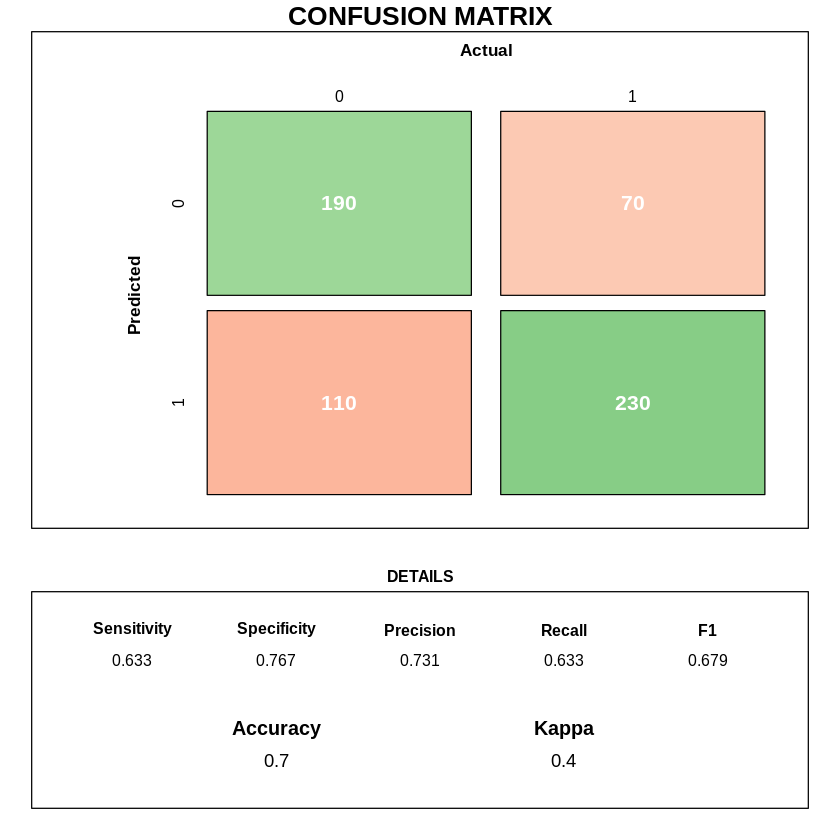

In [ ]:
draw_confusion_matrix(cm)

#### **2. 랜덤포레스트(Randomforest)**

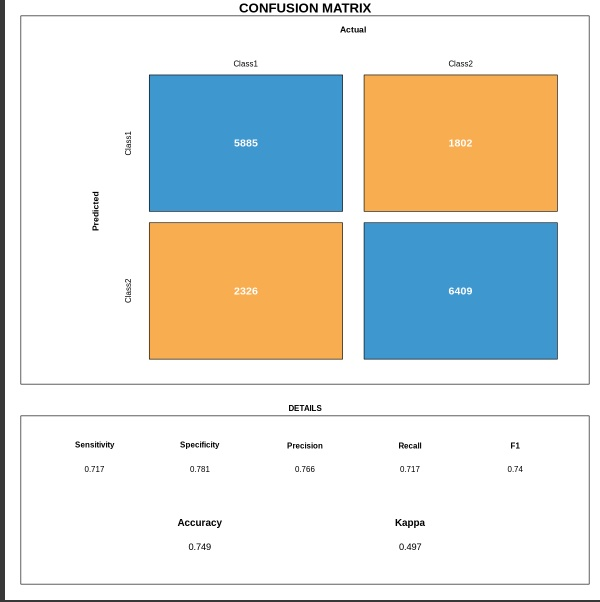

In [ ]:
#랜덤포레스트에 필요한 packages를 설치합니다.
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:rattle’:

    importance


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
#summary함수를 사용하여 요약해서 봅니다.
summary(train)

 HeartDisease      BMI        Smoking AlcoholDrinking Stroke   PhysicalHealth  
 0:700        Min.   :13.31   0:725   0:1323          0:1263   Min.   : 0.000  
 1:700        1st Qu.:24.41   1:675   1:  77          1: 137   1st Qu.: 0.000  
              Median :27.89                                    Median : 0.000  
              Mean   :28.88                                    Mean   : 5.511  
              3rd Qu.:32.01                                    3rd Qu.: 5.000  
              Max.   :64.20                                    Max.   :30.000  
                                                                               
  MentalHealth    DiffWalking Sex      AgeCategory  Race     Diabetic
 Min.   : 0.000   0:1071      1:668   11     :191   1:  25   0:1100  
 1st Qu.: 0.000   1: 329      2:732   10     :177   2:  22   1: 300  
 Median : 0.000                       13     :173   3: 106           
 Mean   : 4.119                       12     :163   4: 123           
 3rd Qu.: 

In [ ]:
#HeartDisease를 반응변수로 합니다.
#train데이터로 randomForest함수를 실행합니다.
HD_RF <- randomForest(HeartDisease ~ . -1, data = train, na.action = na.omit, importance = T, mtry = 7, ntree = 1000)
HD_RF


Call:
 randomForest(formula = HeartDisease ~ . - 1, data = train, importance = T,      mtry = 7, ntree = 1000, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 7

        OOB estimate of  error rate: 27.57%
Confusion matrix:
    0   1 class.error
0 482 218   0.3114286
1 168 532   0.2400000

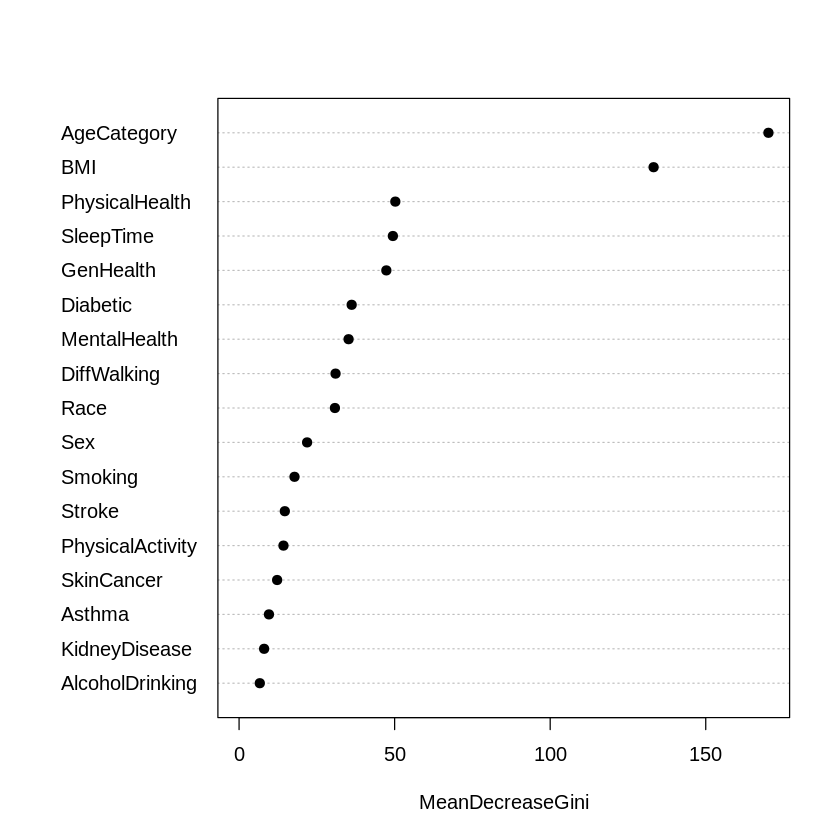

In [ ]:
#중요도를 알아서 시각화를 합니다.
varImpPlot(HD_RF, type = 2, pch = 19, col = 1, cex = 1, main = "")

In [ ]:
#predict함수를 사용하여 예측을 실행합니다.
predict_value <- predict(HD_RF, test, type = "class") %>% 
 tibble(predict_value = .)
predict_check <- test %>% select(HeartDisease) %>% dplyr::bind_cols(., predict_value) 

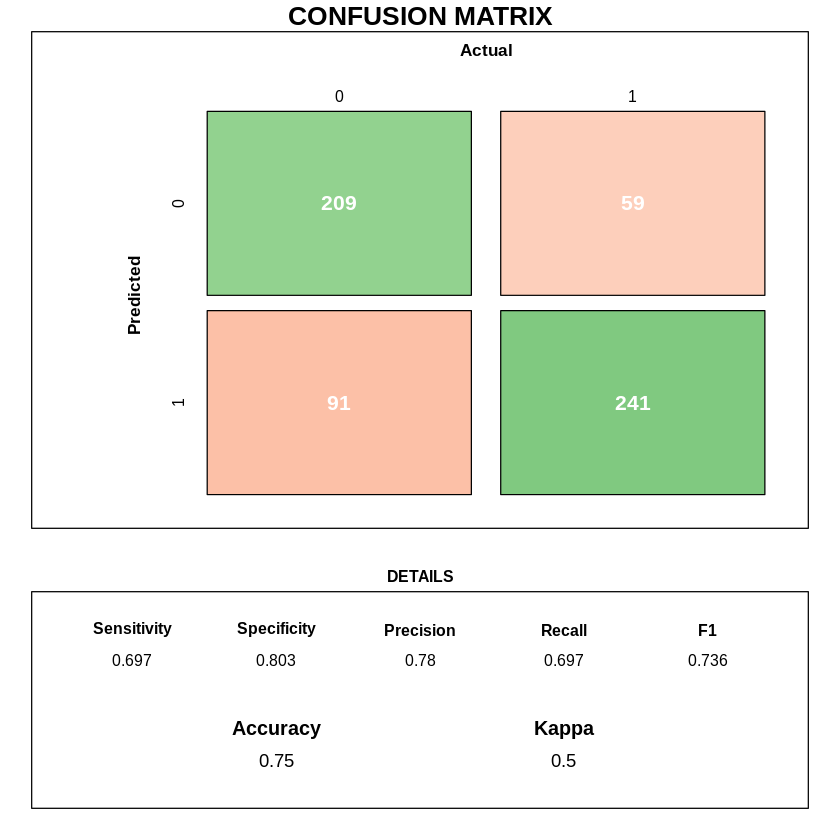

In [ ]:
#caret::confusionMatrix를 사용하여 랜덤 포레스트 함수를 시각화 합니다.
cm <- caret::confusionMatrix(predict_value$predict_value, test$HeartDisease)
draw_confusion_matrix(cm)

#### **3. SVM(Support Vector Machine)**

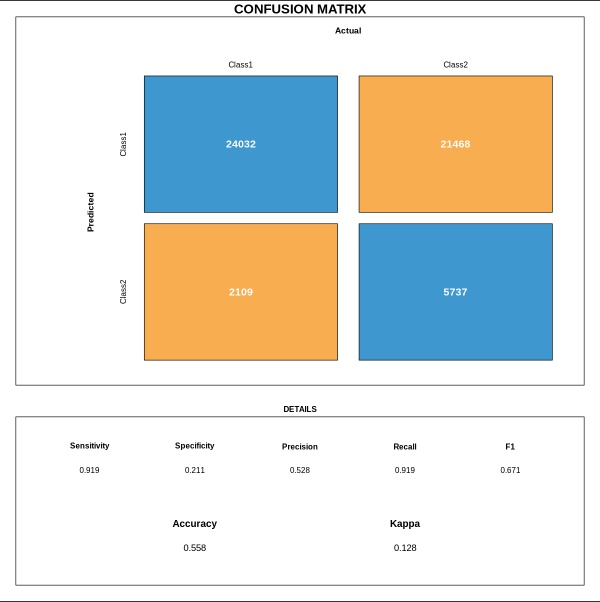

In [ ]:
#서포트 벡터 머신을 생성한다. formula에서 모델 포뮬러를 입력합니다.
svm_HD <- e1071::svm(formula = HeartDisease ~ ., data = train, type = "C-classification", kernel = "radial")
summary(svm_HD)


Call:
svm(formula = HeartDisease ~ ., data = train, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  946

 ( 477 469 )


Number of Classes:  2 

Levels: 
 0 1




In [ ]:
#predict함수를 사용하여 test셋을 svm_HD로 예측합니다.
predict_value <- predict(svm_HD, test) %>% 
 tibble(predict_value = .)

 #predict한 예측 결과가 정확한지 알기위해 predict_check를 만들어 다시 확인합니다.
predict_check <- test %>% select(HeartDisease) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 600 × 2
   HeartDisease predict_value
   <fct>        <fct>        
 1 0            1            
 2 1            1            
 3 0            0            
 4 0            1            
 5 1            1            
 6 1            1            
 7 1            1            
 8 1            0            
 9 0            0            
10 1            1            
# … with 590 more rows


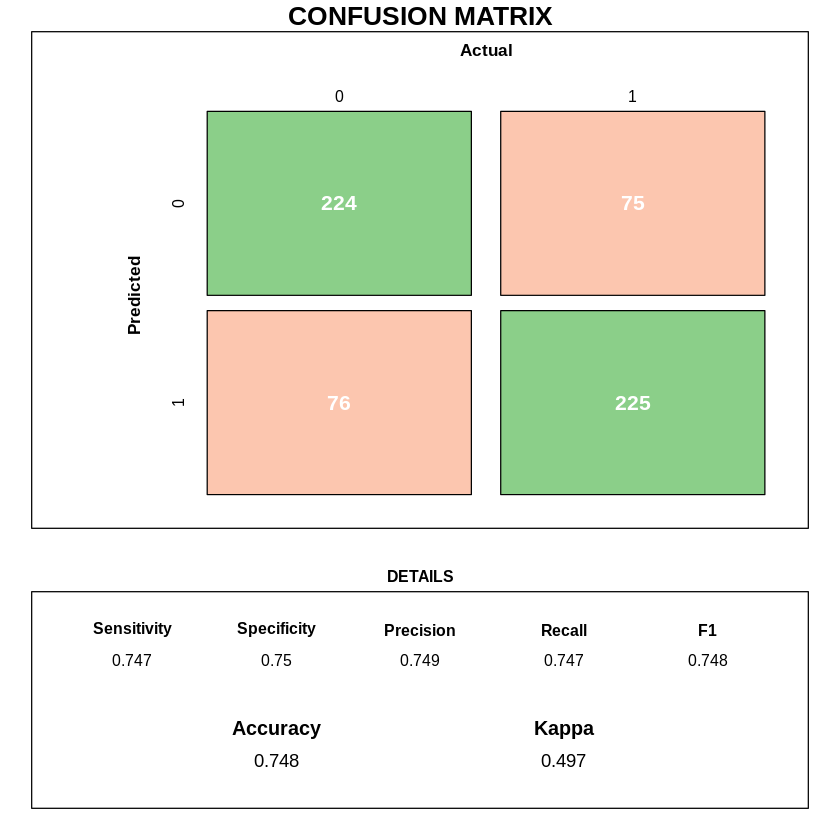

In [ ]:
#caret::confusionMatrix를 사용하여 svm 함수를 시각화 합니다.
cm <- caret::confusionMatrix(predict_value$predict_value, test$HeartDisease)
draw_confusion_matrix(cm)

In [ ]:
#cost값과 감마 값을 더하여 svm_HD2모델을 만듭니다.
svm_HD2 <- e1071::svm(formula = HeartDisease ~ ., data = train, type = "C-classification", kernel = "radial",
cost = 1000, gamma = 0.1)
summary(svm_HD2)


Call:
svm(formula = HeartDisease ~ ., data = train, type = "C-classification", 
    kernel = "radial", cost = 1000, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  732

 ( 364 368 )


Number of Classes:  2 

Levels: 
 0 1




In [ ]:
#predict함수를 사용하여 test셋을 svm_HD2로 예측합니다.
predict_value <- predict(svm_HD2, test) %>% 
 tibble(predict_value = .)

#predict한 예측 결과가 정확한지 알기위해 predict_check를 만들어 다시 확인합니다.
predict_check <- test %>% select(HeartDisease) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 600 × 2
   HeartDisease predict_value
   <fct>        <fct>        
 1 0            1            
 2 1            0            
 3 0            0            
 4 0            0            
 5 1            0            
 6 1            0            
 7 1            0            
 8 1            0            
 9 0            0            
10 1            0            
# … with 590 more rows


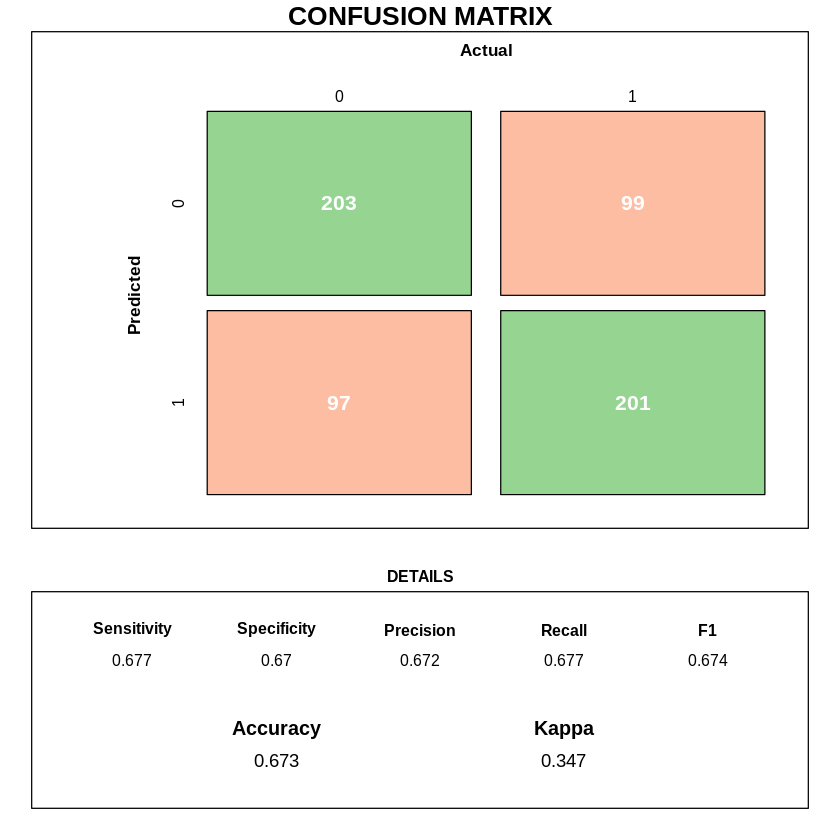

In [ ]:
#caret::confusionMatrix를 사용하여 svm 함수를 시각화 합니다.
cm <- caret::confusionMatrix(predict_value$predict_value, test$HeartDisease)
draw_confusion_matrix(cm)

In [ ]:
#tune()함수를 사용해 모델을 튜닝합니다.
tuned <- e1071::tune.svm(HeartDisease ~ ., data = train, gamma = 10^(-8:1), cost = 1:30)

In [ ]:
#tune함수를 사용해 나온 결과를 summary함수를 사용하여 확인합니다.
tune_summary <- summary(tuned)
tune_summary


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    1

- best performance: 0.2607143 

- Detailed performance results:
    gamma cost     error dispersion
1   1e-08    1 0.5257143 0.01690309
2   1e-07    1 0.5257143 0.01690309
3   1e-06    1 0.5257143 0.01690309
4   1e-05    1 0.5257143 0.01690309
5   1e-04    1 0.5257143 0.01690309
6   1e-03    1 0.3628571 0.04189394
7   1e-02    1 0.2835714 0.03483847
8   1e-01    1 0.2607143 0.02656656
9   1e+00    1 0.3442857 0.03208549
10  1e+01    1 0.5092857 0.03689324
11  1e-08    2 0.5257143 0.01690309
12  1e-07    2 0.5257143 0.01690309
13  1e-06    2 0.5257143 0.01690309
14  1e-05    2 0.5257143 0.01690309
15  1e-04    2 0.5257143 0.01690309
16  1e-03    2 0.3250000 0.03487100
17  1e-02    2 0.2764286 0.02543276
18  1e-01    2 0.2621429 0.02334062
19  1e+00    2 0.3457143 0.03197930
20  1e+01    2 0.5042857 0.03486287
21  1e-08    3 0.5257143 0.01690309
22  1e-07    3 0.5257143 

In [ ]:
#최적의 파라미터 값을 뽑아냅니다.
best_parameter <- tune_summary$best.parameters
best_parameter 

,gamma,cost
,<dbl>,<int>
8,0.1,1


In [ ]:
#tune을 실행한 best_parameter값을 감마값, 비용값에다가 넣고 svm함수를 실행합니다.
svm_HD_tune <- e1071::svm(HeartDisease ~ ., data = train, type = "C-classification", kernel = "radial",
 gamma = best_parameter[1,1], cost = best_parameter[1,2])

In [ ]:
summary(svm_HD_tune)


Call:
svm(formula = HeartDisease ~ ., data = train, type = "C-classification", 
    kernel = "radial", gamma = best_parameter[1, 1], cost = best_parameter[1, 
        2])


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  953

 ( 485 468 )


Number of Classes:  2 

Levels: 
 0 1




In [ ]:
#predict함수를 사용하여 test셋을 svm_HD_tune로 예측합니다.
predict_value <- predict(svm_HD_tune, test) %>% 
 tibble(predict_value = .)

#predict한 예측 결과가 정확한지 알기위해 predict_check를 만들어 다시 확인합니다.
predict_check <- test %>% select(HeartDisease) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 600 × 2
   HeartDisease predict_value
   <fct>        <fct>        
 1 0            1            
 2 1            1            
 3 0            0            
 4 0            1            
 5 1            1            
 6 1            1            
 7 1            1            
 8 1            0            
 9 0            0            
10 1            1            
# … with 590 more rows


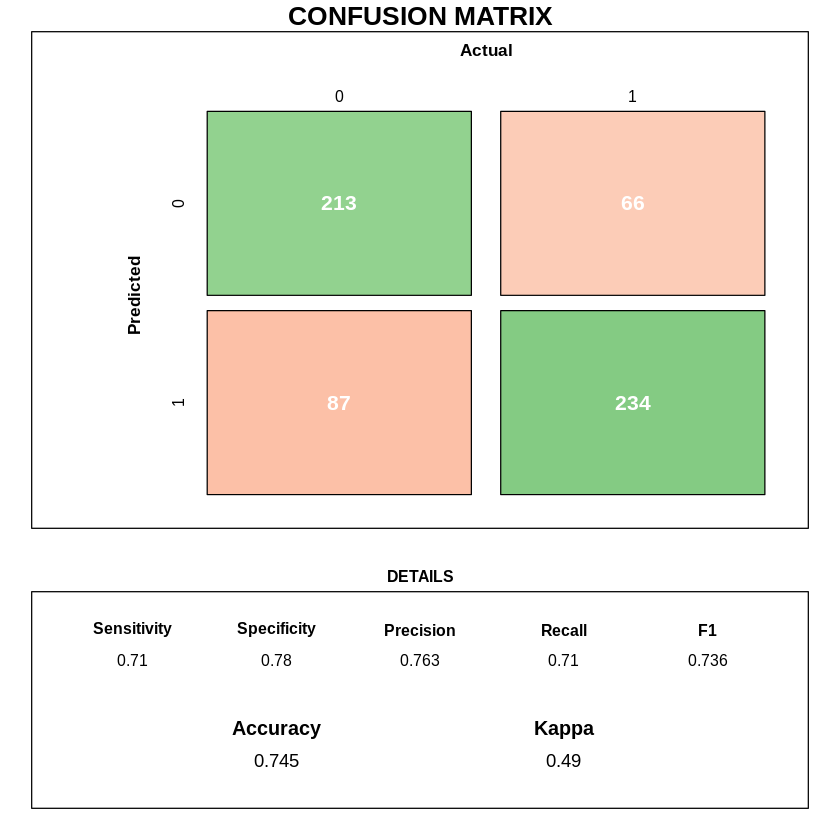

In [ ]:
#caret::confusionMatrix를 사용하여 svm 함수를 시각화 합니다.
cm <- caret::confusionMatrix(predict_value$predict_value, test$HeartDisease)
draw_confusion_matrix(cm)